In [1]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 
# helps to ignore the warning

In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install text_hammer   # used to avoud the spelling correction

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 14.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
import text_hammer as th

In [5]:
import seaborn as sns   # used to visualize the exploratory data

In [6]:
import matplotlib.pyplot as plt  # used to plot the data in graph

In [7]:
import re      # used for the regular expression

In [8]:
from wordcloud import STOPWORDS    # wordcloud is used to identify the specific words

In [9]:
from collections import defaultdict  # importing dictonary defaulty through the collection

In [10]:
from tqdm._tqdm_notebook import tqdm_notebook  # library is used to creating the progress bar

In [11]:
tqdm_notebook.pandas()  # where these notebook of tqdm uses pandas library

In [12]:
! pip install transformers  # installation of transformer in Bert Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 14.9 MB/s 
     |████████████████████████████████| 182 kB 76.4 MB/s 
     |████████████████████████████████| 7.6 MB 60.8 MB/s 


In [13]:
from transformers import AutoTokenizer,TFBertModel   # transformer helps to automatic tokenizating for every significant words and uses the tensor flow model

In [14]:
max_len = 36   # fixing the maximum length as 36

In [15]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')     # GPU is configured for tensorflow

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
from tensorflow.keras.optimizers import Adam     # tensorflow based keras optimizer is used where adam acts as optimizer

In [17]:
from tensorflow.keras.callbacks import EarlyStopping     # for keras callbacks earlystopping is imported

In [18]:
from tensorflow.keras.initializers import TruncatedNormal   # trancated normal intializer is used to intialize 

In [19]:
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy   # losses are identified by using crossentropy and binary entropy

In [20]:
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy   # metrics are identified using accuracies

In [21]:
from tensorflow.keras.utils import to_categorical  # collection of small python function and class which makes common pattern and it is imported to categorical data

In [22]:
from tensorflow.keras.utils import plot_model  # used for plotting the model

In [23]:
from tensorflow.keras.layers import Input, Dense     #  Keras Dense layer that is regular deep connected layer

In [24]:
from nltk.corpus import stopwords    # nltk corpus library is used to stop the word while preprocessing
from wordcloud import WordCloud      # importing wordcloud to represent the stop word

In [25]:
from google.colab import drive
drive.mount('/content/drive')    # importing drive dataset in google colab 

Mounted at /content/drive


In [26]:
train_data = pd.read_csv('/content/drive/MyDrive/Assam_tweets (2).csv')

In [27]:
train_data.head(25)   # trained with obtained features

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj..."
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin..."
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu..."
5,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
6,1.544307e+18,NaN,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu..."
7,1.544307e+18,NaN,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak..."
8,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
9,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."


In [28]:
test_data  = pd.read_csv( '/content/drive/MyDrive/Test set of 2022- Assam twitterdata - Copy of 2022- Assam twitterdata.csv',usecols=['tweet_id', 'tweet_text','name'])

In [29]:
test_data.head(25)  # tweets to be tested without target value

,tweet_id,tweet_text,name
0,1541458926977581056,Calling for HELP! Assam needs YOU!\n\nThe wors...,ConnectFor
1,1541458728603602945,"RT @kharge: 32 districts flooded, 50 lakh peop...",IDLE INDIAN
2,1541458682331922433,RT @Indian_Rivers: DRP NB 270622: There are ma...,International Rivers
3,1541458618582958080,"RT @aajtak: पानी ने रोक दी जिंदगी, देखिये ख़ास...",Aditya R Singh
4,1541458372653748224,RT @tooooldschool: *For relief work in Assam F...,hifza
5,1541457938262491137,@IndiaToday @sardesairajdeep Assam as topograp...,Time2Rise
6,1541457871724253185,RT @johnxavier659: Please \n #MODIJIextendNEET...,Anu❣️
7,1541457534544134144,"During the past 24 hours in Assam, five more p...",Business Today
8,1541457281157677057,"RT @Article14live: ""My daughter told some peop...",EIon Mosk (Parody)
9,1541457115746893830,RT @sardesairajdeep: Our news focus tonight: h...,Sunil M. Caleb سنیل کا؛لب


In [30]:
# After Feature selected  then next stage preprocessing the data
def text_preprocessing(df,col_name):   # defining the text preprocessing with column name
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())  # defining the specified columns with lower case
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))   # helps to remove the email id
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))   # helps to remove the htmal tags
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))  # helps to remove the special characters
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x)) # helps to remove the shortcut keywords
    return(df)

In [31]:
train_cleaned_data = text_preprocessing(train_data,'tweet_text')   # above mentioned preprocessing steps are implemented to specific coloum 'tweettext' from the train dataset

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [32]:
train_data = train_cleaned_data.copy()
train_data.head (5) 

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj..."
1,1.544307e+18,NaN,rt the_hindu president ramnathkovind called as...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin..."
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu..."


In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
sentiments = SentimentIntensityAnalyzer()
train_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in train_data["tweet_text"]]
train_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in train_data["tweet_text"]]
train_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in train_data["tweet_text"]]
train_data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in train_data["tweet_text"]]
train_data.head(25)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960
1,1.544307e+18,NaN,rt the_hindu president ramnathkovind called as...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.00,0.000,1.000,0.0000
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
6,1.544307e+18,NaN,rt arunpudur assam kabul khan mithu hussain la...,2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.00,0.252,0.748,-0.7506
7,1.544307e+18,NaN,rt byrakeshsimha flood jehadassam police have ...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.00,0.291,0.709,-0.8126
8,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267
9,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506


In [35]:
train_data.drop(train_data.index[train_data['Compound'] == 0.0000], inplace = True)

In [36]:
train_data

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819
19996,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819
19997,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819
19998,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819


In [37]:
score = train_data["Compound"].values
sentiment = []

for i in score:
    if i > 0.05 :
        sentiment.append('Positive')
      
  
    else:
        sentiment.append('Negative')
       
train_data["Sentiment"] = sentiment
train_data.head(10)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.0,0.109,0.891,-0.2960,Negative
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.145,0.855,-0.5267,Negative
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.0,0.214,0.786,-0.6007,Negative
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative
6,1.544307e+18,NaN,rt arunpudur assam kabul khan mithu hussain la...,2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.0,0.252,0.748,-0.7506,Negative
7,1.544307e+18,NaN,rt byrakeshsimha flood jehadassam police have ...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.0,0.291,0.709,-0.8126,Negative
8,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.145,0.855,-0.5267,Negative
9,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative
10,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:21+00:00,Bharat,अवधूत,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative


In [38]:
train_data['label'] = pd.Series([1.0,0.0])
train_data["label"].loc[train_data["Sentiment"]=="Positive"]=1.0
train_data["label"].loc[train_data["Sentiment"]=="Negative"]=0.0
train_data

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960,Negative,0.0
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506,Negative,0.0
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267,Negative,0.0
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007,Negative,0.0
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506,Negative,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19996,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19997,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19998,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0


In [39]:
train_data[train_data.label == 1.0]

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
30,1.544307e+18,NaN,rt carbon_stink my story for the newhumanitari...,2022-07-05 13:05:48+00:00,NaN,SILICON 27,[],"[{'screen_name': 'carbon_stink', 'name': 'Aatr...",0.095,0.000,0.905,0.2732,Positive,1.0
43,1.544306e+18,NaN,rt hardeepspuri truly inspirationaldelivering ...,2022-07-05 13:04:51+00:00,"Navi Mumbai, India",Suresh Nair,"[{'text': 'Assam', 'indices': [107, 113]}]","[{'screen_name': 'HardeepSPuri', 'name': 'Hard...",0.262,0.173,0.565,0.2960,Positive,1.0
75,1.544306e+18,NaN,rt carbon_stink my story for the newhumanitari...,2022-07-05 13:02:29+00:00,"New Delhi, India",Vijayta Lalwani,[],"[{'screen_name': 'carbon_stink', 'name': 'Aatr...",0.095,0.000,0.905,0.2732,Positive,1.0
113,1.544305e+18,NaN,rt carbon_stink my story for the newhumanitari...,2022-07-05 12:59:15+00:00,"Houston, TX",LadyLisaDCantu,[],"[{'screen_name': 'carbon_stink', 'name': 'Aatr...",0.095,0.000,0.905,0.2732,Positive,1.0
123,1.544305e+18,NaN,rt aghastya7jain there has been a catatrophic ...,2022-07-05 12:58:56+00:00,NaN,venkatR,[],"[{'screen_name': 'Aghastya7jain', 'name': '𝗔𝗴𝗵...",0.190,0.000,0.810,0.5719,Positive,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19858,1.542903e+18,NaN,rt hemkunt_fdn day 7 assamfloods the relief ca...,2022-07-01 16:09:47+00:00,"odisha, India",Prabhat,"[{'text': 'AssamFloods', 'indices': [23, 35]}]","[{'screen_name': 'Hemkunt_Fdn', 'name': 'Hemku...",0.117,0.087,0.795,0.2023,Positive,1.0
19882,1.542901e+18,NaN,rt hemkunt_fdn day 7 assamfloods the relief ca...,2022-07-01 15:59:07+00:00,"Garden Grove, CA",Gonveer Johal,"[{'text': 'AssamFloods', 'indices': [23, 35]}]","[{'screen_name': 'Hemkunt_Fdn', 'name': 'Hemku...",0.117,0.087,0.795,0.2023,Positive,1.0
19884,1.542900e+18,NaN,rt hemkunt_fdn day 7 assamfloods the relief ca...,2022-07-01 15:58:31+00:00,"New Delhi, India",Surinder Singh Suri,"[{'text': 'AssamFloods', 'indices': [23, 35]}]","[{'screen_name': 'Hemkunt_Fdn', 'name': 'Hemku...",0.117,0.087,0.795,0.2023,Positive,1.0
19897,1.542900e+18,NaN,rt tejasvi_surya pm shri narendramodi ji cm hi...,2022-07-01 15:55:11+00:00,NaN,Shivajit Biswas,[],"[{'screen_name': 'Tejasvi_Surya', 'name': 'Tej...",0.123,0.000,0.877,0.4215,Positive,1.0


In [40]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
train_data['tweet_text'] = train_data['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
disaster_tweets = train_data[train_data.label == 0] # flood disaster tweets are represented as disaster tweets
disaster_string = [] # declaring the disaster string from the flood disaster tweets
for t in disaster_tweets.tweet_text:    # checking for the tweet text from the disaster tweets
    disaster_string.append(t)   # append words for tweet text 
disaster_string = pd.Series(disaster_string).str.cat(sep=' ')    # catenation of the disaster string

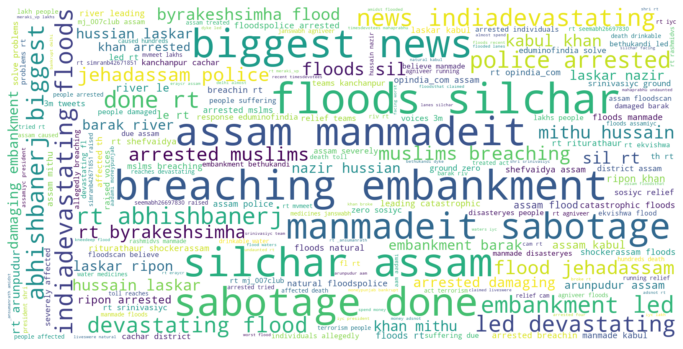

In [42]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(disaster_string)  # collecting disaster string and representation in wordclouds
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
formal_tweets = train_data[train_data.label == 1.0]   # formal tweets are declared by taking the target value 0
formal_string = []   #formal strings obtained from the dataset 
for t in formal_tweets.tweet_text:
    formal_string.append(t)  # append the string
formal_string = pd.Series(formal_string).str.cat(sep=' ')    # concatenation of words

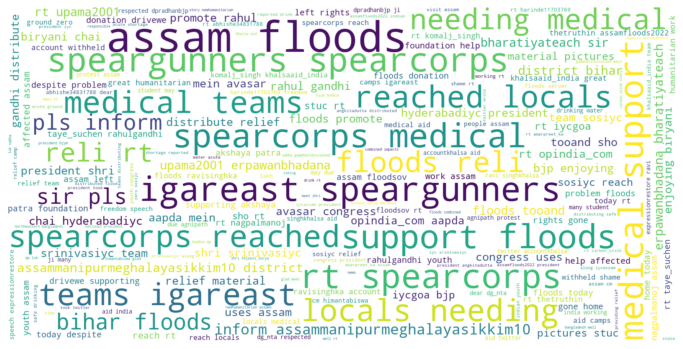

In [44]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(formal_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

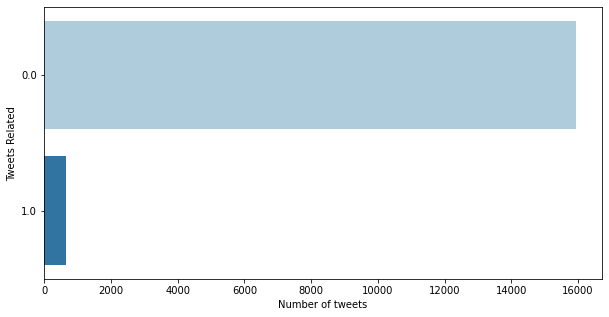

In [45]:
plt.figure(figsize=(10,5))  # to plot the numnber of tweets falls in disaster and non disaster
sns.countplot(y='label',data = train_data,palette="Paired") # based on the target value, counter plot is done 
plt.ylabel("Tweets Related")
plt.xlabel("Number of tweets")
plt.show()

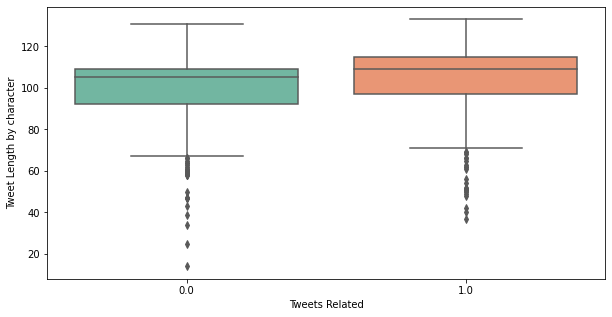

In [46]:
plt.figure(figsize=(10,5))
train_sent = train_data['tweet_text'].str.len()  # taking the length of the tweet text character
sns.boxplot(x="label",y=train_sent,data=train_data,palette="Set2")  # taking the target value as X, Y value is considered as the tweet length 
plt.xlabel("Tweets Related")
plt.ylabel("Tweet Length by character")
plt.show()

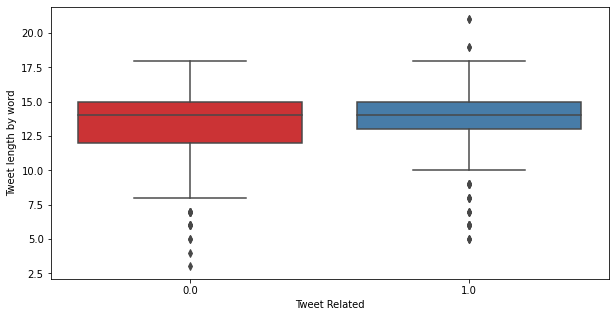

In [47]:
plt.figure(figsize=(10,5))
train_sent = train_data['tweet_text'].str.split().map(lambda x : len(x))  # taking the length of the tweet text words
sns.boxplot(x="label",y=train_sent,data=train_data,palette="Set1") # taking x as target and Y as the lenth of tweets
plt.xlabel("Tweet Related")
plt.ylabel("Tweet length by word")
plt.show()

In [48]:
train_data['word_count'] = train_data['tweet_text'].apply(lambda x: len(str(x).split()))  # word count of tweet text from train data
test_data['word_count'] = test_data['tweet_text'].apply(lambda x: len(str(x).split()))    # word count of tweet text from test data

In [49]:
train_data['unique_word_count'] = train_data['tweet_text'].apply(lambda x: len(set(str(x).split()))) # identifying unique word count of tweet text from the train data 
test_data['unique_word_count'] = test_data['tweet_text'].apply(lambda x: len(set(str(x).split())))  # identifying unique word count of tweet text from the test data

In [50]:
train_data['stop_word_count'] = train_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])) # identifying the stop word count of the train set
test_data['stop_word_count'] = test_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])) # identifying the stop word of the test set

In [51]:
train_data['url_count'] = train_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w])) #identifying the url count identified in train set which starts with http and https
test_data['url_count'] = test_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))  # identifying the url count identified in test set which start with http and https.

In [52]:
train_data['mean_word_length'] = train_data['tweet_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()])) # finding the mean for word length for tweet text in train set 
test_data['mean_word_length'] = test_data['tweet_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))  # finding the mean for word length of the tweet text in test set

In [53]:
train_data['char_count'] = train_data['tweet_text'].apply(lambda x: len(str(x)))  # character counting for the specified coloumn, tweet_text in train set   
test_data['char_count'] = test_data['tweet_text'].apply(lambda x: len(str(x)))  # character counting for the specified coloumn text in test set

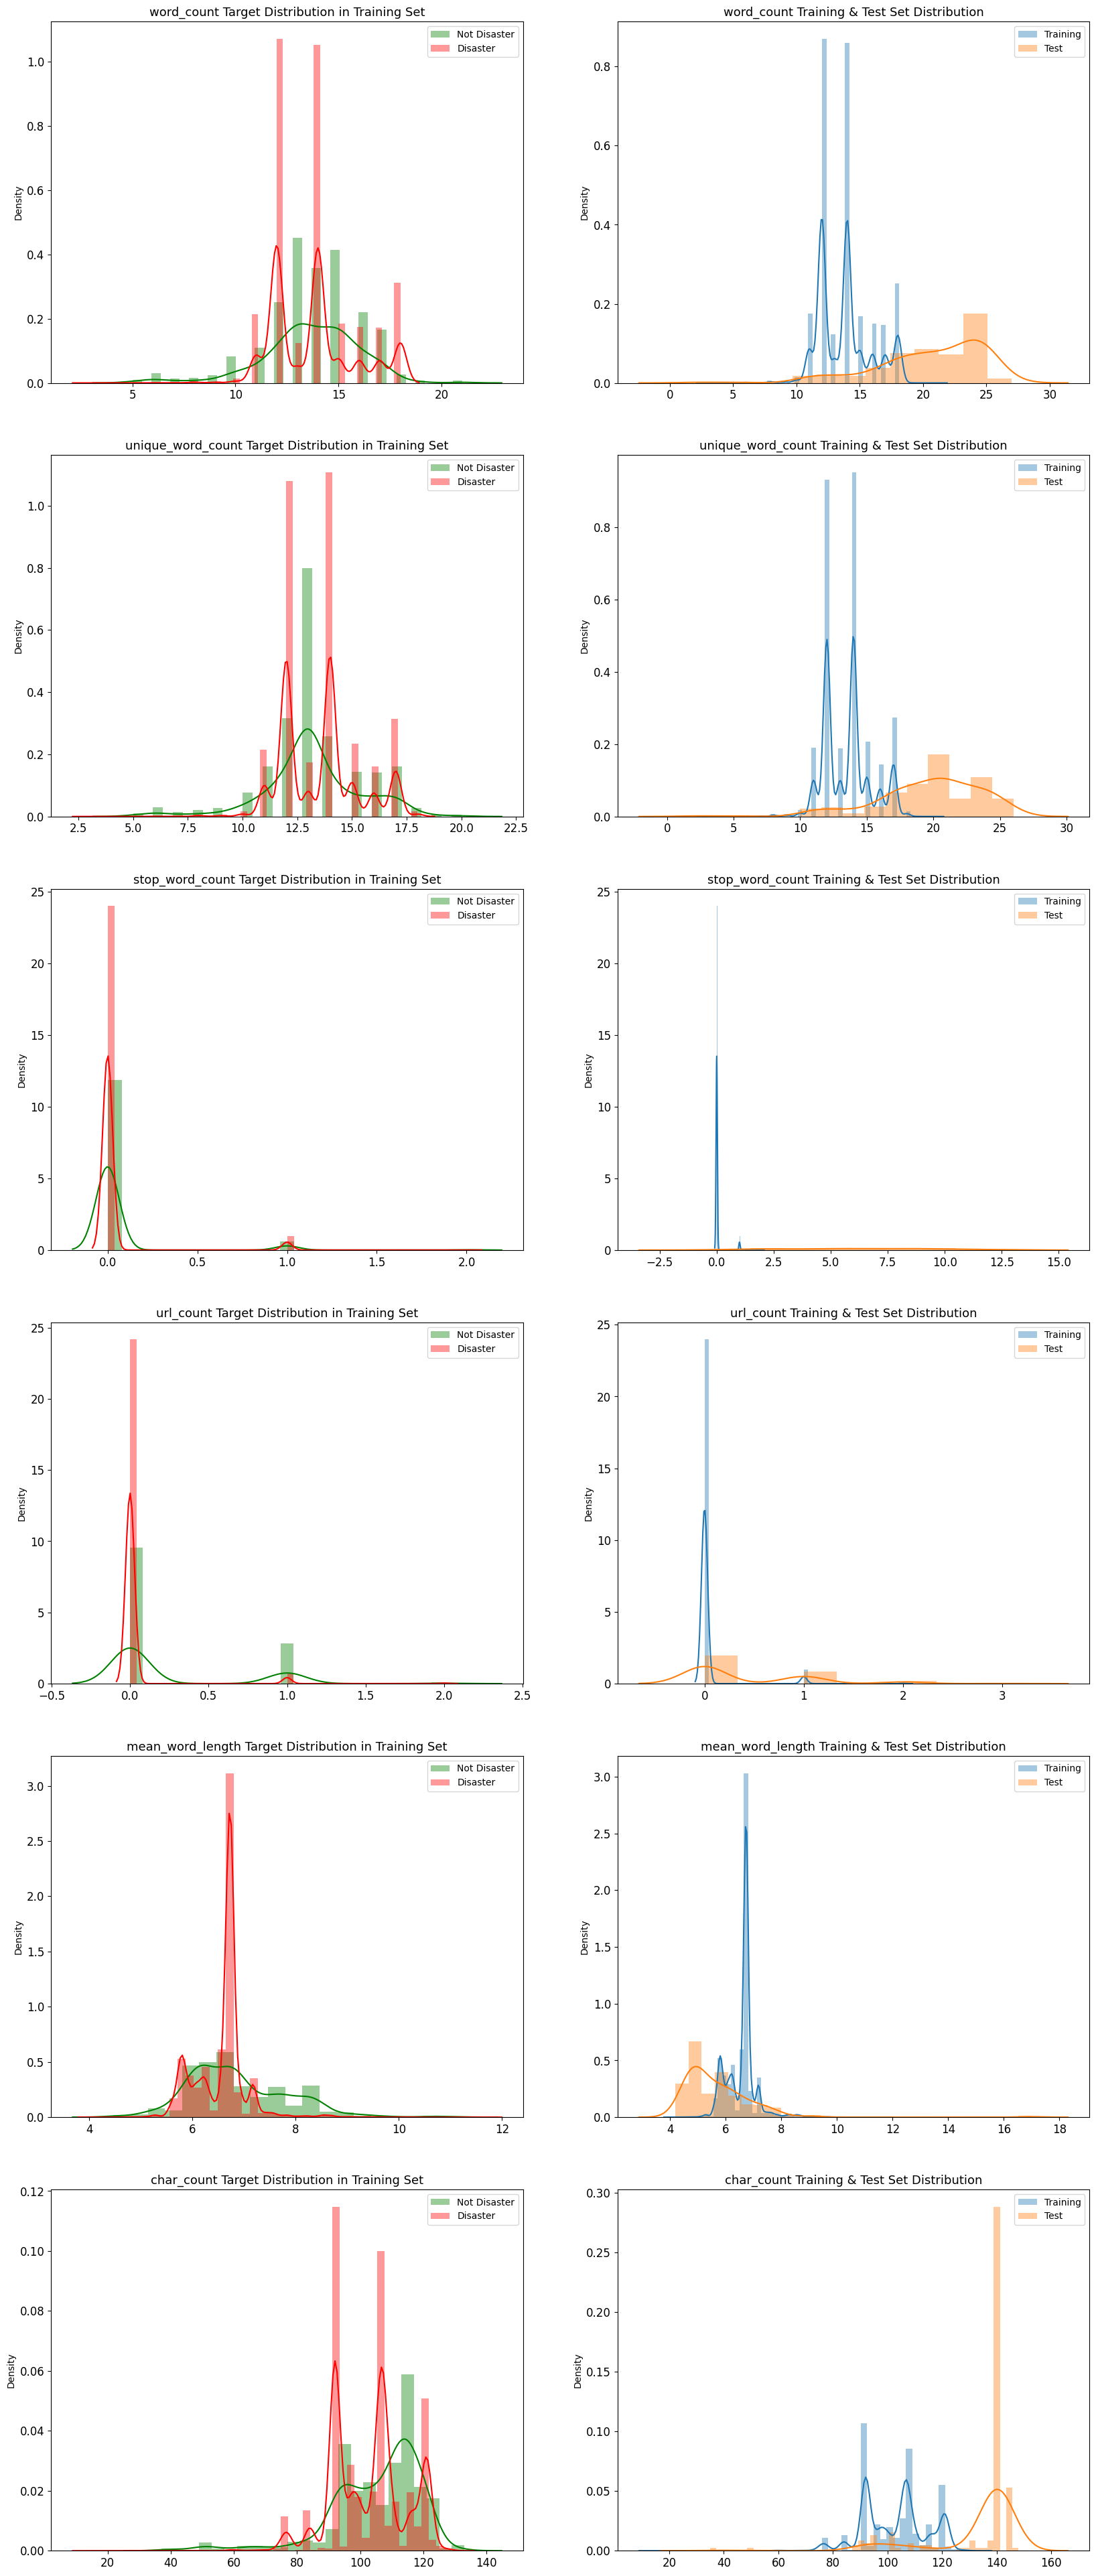

In [54]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length','char_count']
DISASTER_TWEETS = train_data['label'] == 0   # assigning target 1 of train set

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):     # enumeration of the metafeatures
    sns.distplot(train_data.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')    # plotting the disaster tweets
    sns.distplot(train_data.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')   # plotting the non-disaster tweets
    sns.distplot(train_data[feature], label='Training', ax=axes[i][1])   # ploting the train data
    sns.distplot(test_data[feature], label='Test', ax=axes[i][1])  # ploting the test data
    
    for j in range(2):       # j ranges from 2
        axes[i][j].set_xlabel('')     # X axes value is set
        axes[i][j].tick_params(axis='x', labelsize=12) # tick parameters with X axes
        axes[i][j].tick_params(axis='y', labelsize=12)  # tick parameters with Y axes
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)   # axes of 1, 0 is considered as target distribution in training set
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)     # axes 1, 1 is set to set distribution of training and test set

plt.show()

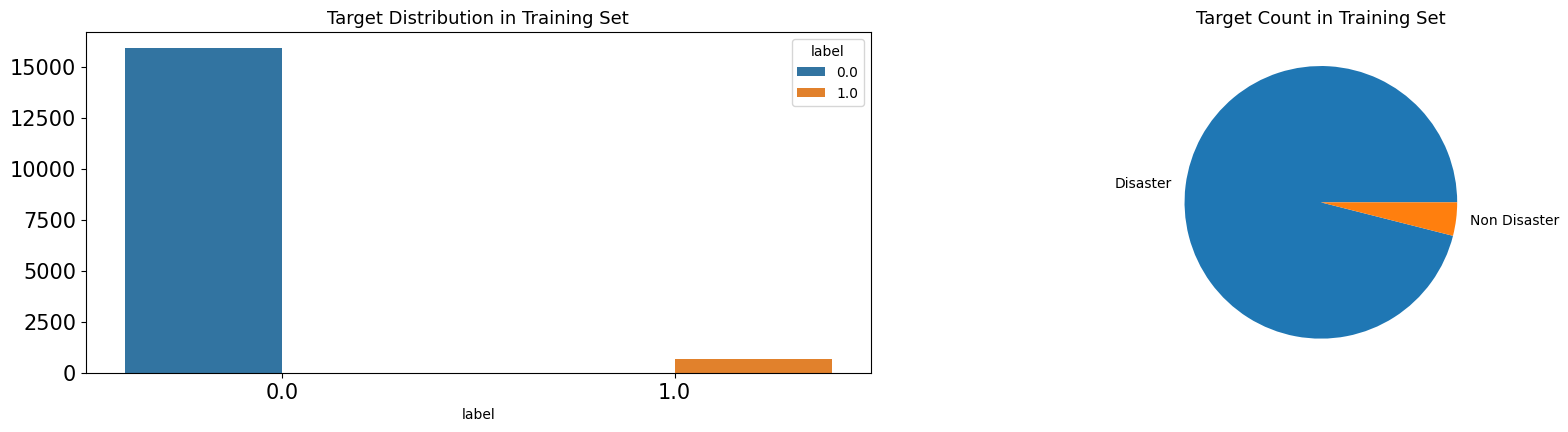

In [55]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train_data.groupby('label').count()['name'].plot(kind='pie', ax=axes[1], labels=['Disaster', 'Non Disaster'])  #disaster and non disaster tweets are classified using target and username
sns.countplot(x=train_data['label'], hue=train_data['label'], ax=axes[0]) # plot the graph with disaster and non disaster with respect to target value

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Disaster ', 'Non Disaster '])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

In [56]:
train_data_non_disaster = train_data[train_data['label']== 1]
train_data_non_disaster.shape

(655, 20)

In [57]:
train_data_disaster = train_data[train_data['label']== 0]
train_data_disaster.shape

(15923, 20)

In [58]:
from sklearn.utils import resample
train_data_disaster_upsample = resample(train_data_non_disaster,
             replace=True,
             n_samples=len(train_data_disaster),
             random_state=42)

In [59]:
print(train_data_disaster_upsample.shape)

(15923, 20)


In [60]:
print(train_data_disaster.shape)

(15923, 20)


In [61]:
train_data_balanced = pd.concat([train_data_disaster_upsample,train_data_disaster ])

In [62]:
print(train_data_balanced["label"].value_counts())

1.0    15923
0.0    15923
Name: label, dtype: int64


In [63]:
train_data_balanced['label'].value_counts()

1.0    15923
0.0    15923
Name: label, dtype: int64

In [64]:
 train_data_balanced ['label'].head()

6076     1.0
18442    1.0
15317    1.0
6222     1.0
3084     1.0
Name: label, dtype: float64

In [65]:
train_data = train_data_balanced

In [66]:
# After Feature selected  then next stage preprocessing the data
def text_preprocessing(df,col_name):   # defining the text preprocessing with column name
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())  # defining the specified columns with lower case
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))   # helps to remove the email id
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))   # helps to remove the htmal tags
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))  # helps to remove the special characters
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x)) # helps to remove the shortcut keywords
    return(df)

In [67]:
train_cleaned_data = text_preprocessing(train_data,'tweet_text')   # above mentioned preprocessing steps are implemented to specific coloum 'tweettext' from the train dataset

  0%|          | 0/31846 [00:00<?, ?it/s]

  0%|          | 0/31846 [00:00<?, ?it/s]

  0%|          | 0/31846 [00:00<?, ?it/s]

  0%|          | 0/31846 [00:00<?, ?it/s]

  0%|          | 0/31846 [00:00<?, ?it/s]

In [68]:
train_cleaned_data[train_cleaned_data.label == 0]

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960,Negative,0.0,15,14,0,0,6.733333,115
2,1.544307e+18,NaN,rt ratansharda55 debating amravati udaipur ajm...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506,Negative,0.0,13,13,0,0,6.615385,98
3,1.544307e+18,NaN,rt abhishbanerj biggest news indiadevastating ...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267,Negative,0.0,12,12,0,0,6.750000,92
4,1.544307e+18,NaN,rt eraycr assam floodsthat claimed 170 liveswe...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007,Negative,0.0,18,17,0,0,5.666667,119
5,1.544307e+18,NaN,rt ratansharda55 debating amravati udaipur ajm...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506,Negative,0.0,13,13,0,0,6.615385,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
19996,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
19997,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
19998,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84


In [69]:
train_data = train_cleaned_data.copy()
train_data.head (5)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count
6076,1.544206e+18,NaN,rt upama2001 erpawanbhadana bharatiyateach sir...,2022-07-05 06:27:00+00:00,Earth se hu bhai...,s.d.t.a,[],"[{'screen_name': 'upama2001', 'name': 'Upama D...",0.085,0.0,0.915,0.0772,Positive,1.0,13,13,0,0,8.307692,120
18442,1.543459e+18,NaN,rt aitc4assam wonders double engine modelall t...,2022-07-03 04:59:37+00:00,NaN,Piyarul islam,[],"[{'screen_name': 'AITC4Assam', 'name': 'AITC A...",0.132,0.0,0.868,0.4404,Positive,1.0,14,14,0,0,6.785714,108
15317,1.543921e+18,NaN,rt taye_suchen rahulgandhi youth assam left ri...,2022-07-04 11:31:58+00:00,Dibrugarh (ASSAM),Bhaskar Borah,[],"[{'screen_name': 'taye_suchen', 'name': 'Suche...",0.093,0.0,0.907,0.3089,Positive,1.0,14,13,0,0,5.857143,95
6222,1.544205e+18,NaN,news assam floods embankment breach seculars t...,2022-07-05 06:21:04+00:00,"पुसा, भारत",Atul kumar 🇮🇳,[],[],0.141,0.0,0.859,0.4215,Positive,1.0,9,9,0,0,6.444444,66
3084,1.544251e+18,NaN,rt cchrc_silchar thanks tireless efforts assis...,2022-07-05 09:24:38+00:00,DEL-IXS,😷 Deb Choudhury I দেব চৌধুরী I देव चौधरी 🇮🇳,[],"[{'screen_name': 'CCHRC_Silchar', 'name': 'Cac...",0.116,0.0,0.884,0.4404,Positive,1.0,12,11,0,0,6.916667,94


In [70]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
train_data['tweet_text'] = train_data['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
disaster_tweets = train_data[train_data.label == 0] # flood disaster tweets are represented as disaster tweets
disaster_string = [] # declaring the disaster string from the flood disaster tweets
for t in disaster_tweets.tweet_text:    # checking for the tweet text from the disaster tweets
    disaster_string.append(t)   # append words for tweet text 
disaster_string = pd.Series(disaster_string).str.cat(sep=' ')    # catenation of the disaster string

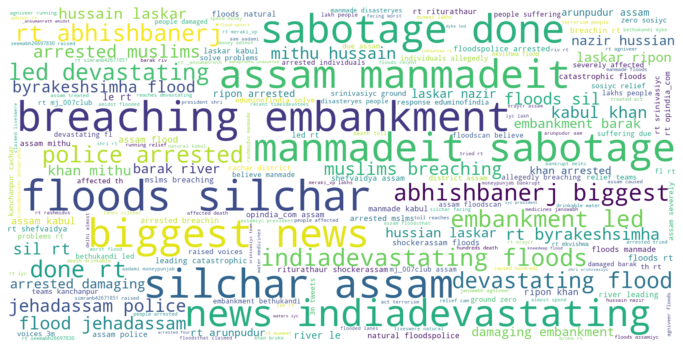

In [72]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(disaster_string)  # collecting disaster string and representation in wordclouds
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [73]:
formal_tweets = train_data[train_data.label == 1]   # formal tweets are declared by taking the target value 0
formal_string = []   #formal strings obtained from the dataset 
for t in formal_tweets.tweet_text:
    formal_string.append(t)  # append the string
formal_string = pd.Series(formal_string).str.cat(sep=' ') 

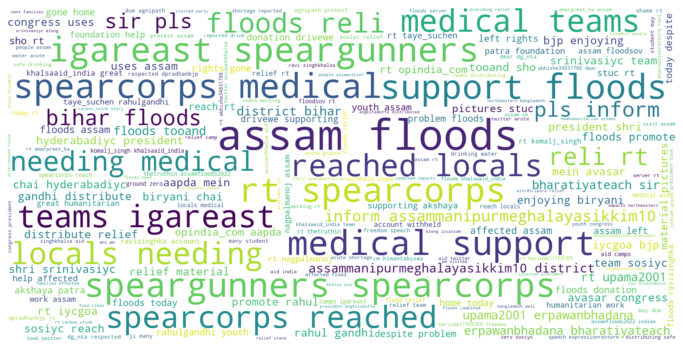

In [74]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(formal_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

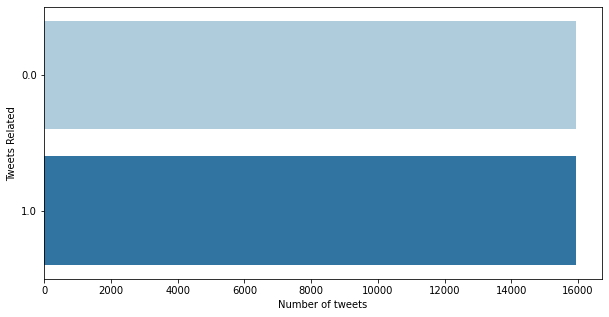

In [75]:
plt.figure(figsize=(10,5))  # to plot the numnber of tweets falls in disaster and non disaster
sns.countplot(y='label',data = train_data,palette="Paired") # based on the target value, counter plot is done 
plt.ylabel("Tweets Related")
plt.xlabel("Number of tweets")
plt.show()

In [76]:
train_data['word_count'] = train_data['tweet_text'].apply(lambda x: len(str(x).split()))  # word count of tweet text from train data
test_data['word_count'] = test_data['tweet_text'].apply(lambda x: len(str(x).split()))    # word count of tweet text from test data

In [77]:
train_data['unique_word_count'] = train_data['tweet_text'].apply(lambda x: len(set(str(x).split()))) # identifying unique word count of tweet text from the train data 
test_data['unique_word_count'] = test_data['tweet_text'].apply(lambda x: len(set(str(x).split())))  # identifying unique word count of tweet text from the test data

In [78]:
train_data['stop_word_count'] = train_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])) # identifying the stop word count of the train set
test_data['stop_word_count'] = test_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])) # identifying the stop word of the test set

In [79]:
train_data['url_count'] = train_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w])) #identifying the url count identified in train set which starts with http and https
test_data['url_count'] = test_data['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))  # identifying the url count identified in test set which start with http and https.

In [80]:
train_data['mean_word_length'] = train_data['tweet_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()])) # finding the mean for word length for tweet text in train set 
test_data['mean_word_length'] = test_data['tweet_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))  # finding the mean for word length of the tweet text in test set

In [81]:
train_data['char_count'] = train_data['tweet_text'].apply(lambda x: len(str(x)))  # character counting for the specified coloumn, tweet_text in train set   
test_data['char_count'] = test_data['tweet_text'].apply(lambda x: len(str(x)))  # character counting for the specified coloumn text in test set

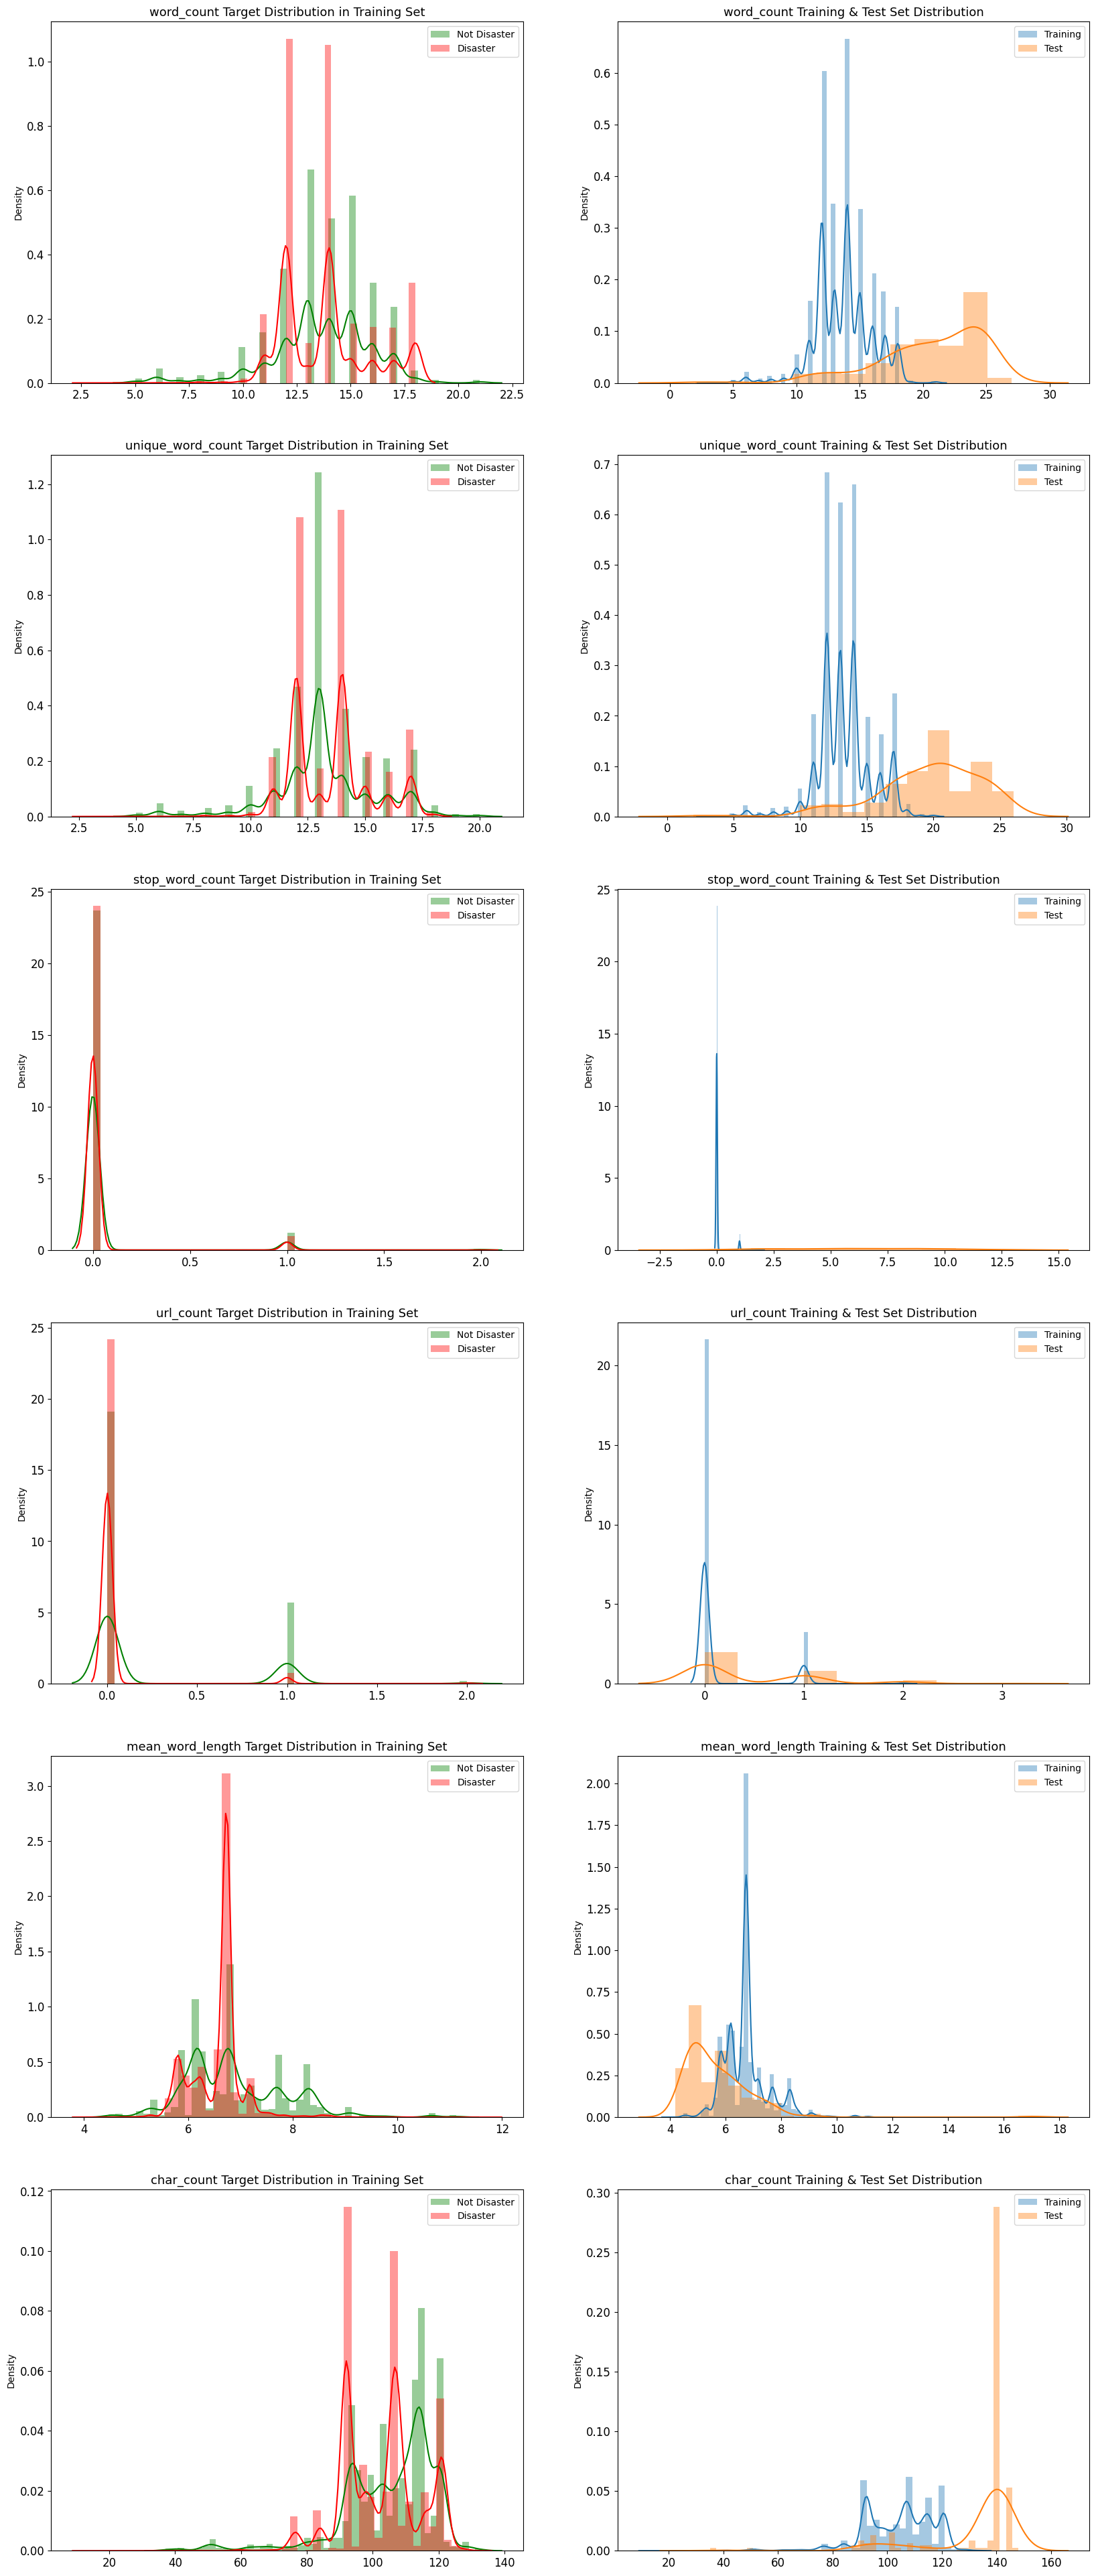

In [82]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length','char_count']
DISASTER_TWEETS = train_data['label'] == 0   # assigning target 1 of train set

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):     # enumeration of the metafeatures
    sns.distplot(train_data.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')    # plotting the disaster tweets
    sns.distplot(train_data.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')   # plotting the non-disaster tweets
    sns.distplot(train_data[feature], label='Training', ax=axes[i][1])   # ploting the train data
    sns.distplot(test_data[feature], label='Test', ax=axes[i][1])  # ploting the test data
    
    for j in range(2):       # j ranges from 2
        axes[i][j].set_xlabel('')     # X axes value is set
        axes[i][j].tick_params(axis='x', labelsize=12) # tick parameters with X axes
        axes[i][j].tick_params(axis='y', labelsize=12)  # tick parameters with Y axes
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)   # axes of 1, 0 is considered as target distribution in training set
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)     # axes 1, 1 is set to set distribution of training and test set

plt.show()

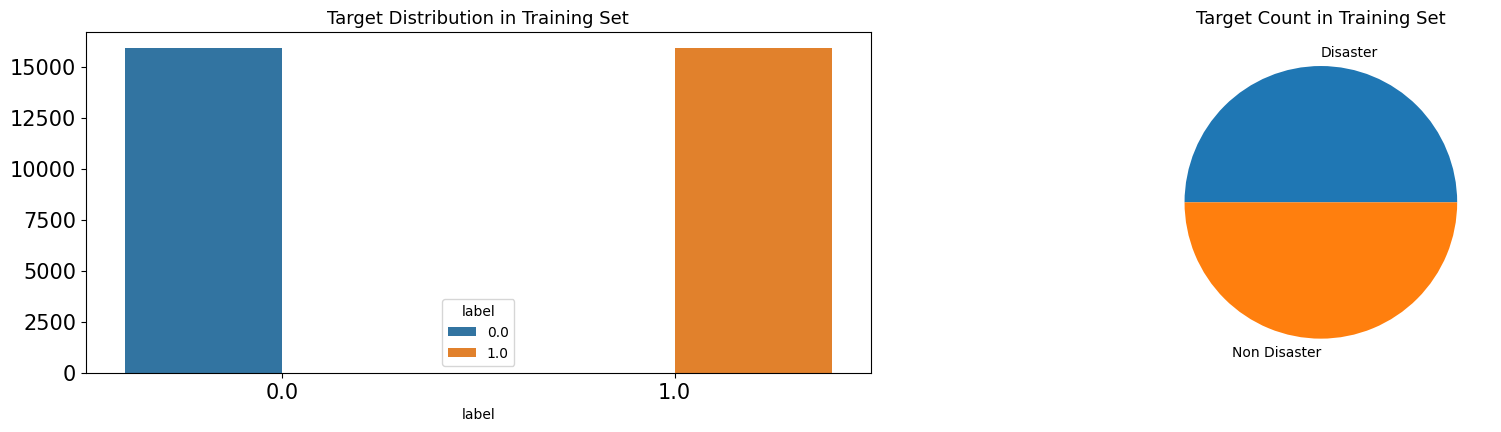

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train_data.groupby('label').count()['name'].plot(kind='pie', ax=axes[1], labels=['Disaster', 'Non Disaster'])  #disaster and non disaster tweets are classified using target and username
sns.countplot(x=train_data['label'], hue=train_data['label'], ax=axes[0]) # plot the graph with disaster and non disaster with respect to target value

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Disaster ', 'Non Disaster '])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

In [84]:
train_data

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count
6076,1.544206e+18,NaN,rt upama2001 erpawanbhadana bharatiyateach sir...,2022-07-05 06:27:00+00:00,Earth se hu bhai...,s.d.t.a,[],"[{'screen_name': 'upama2001', 'name': 'Upama D...",0.085,0.000,0.915,0.0772,Positive,1.0,13,13,0,0,8.307692,120
18442,1.543459e+18,NaN,rt aitc4assam wonders double engine modelall t...,2022-07-03 04:59:37+00:00,NaN,Piyarul islam,[],"[{'screen_name': 'AITC4Assam', 'name': 'AITC A...",0.132,0.000,0.868,0.4404,Positive,1.0,14,14,0,0,6.785714,108
15317,1.543921e+18,NaN,rt taye_suchen rahulgandhi youth assam left ri...,2022-07-04 11:31:58+00:00,Dibrugarh (ASSAM),Bhaskar Borah,[],"[{'screen_name': 'taye_suchen', 'name': 'Suche...",0.093,0.000,0.907,0.3089,Positive,1.0,14,13,0,0,5.857143,95
6222,1.544205e+18,NaN,news assam floods embankment breach seculars t...,2022-07-05 06:21:04+00:00,"पुसा, भारत",Atul kumar 🇮🇳,[],[],0.141,0.000,0.859,0.4215,Positive,1.0,9,9,0,0,6.444444,66
3084,1.544251e+18,NaN,rt cchrc_silchar thanks tireless efforts assis...,2022-07-05 09:24:38+00:00,DEL-IXS,😷 Deb Choudhury I দেব চৌধুরী I देव चौधरी 🇮🇳,[],"[{'screen_name': 'CCHRC_Silchar', 'name': 'Cac...",0.116,0.000,0.884,0.4404,Positive,1.0,12,11,0,0,6.916667,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.060,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
19996,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.060,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
19997,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.060,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
19998,1.542897e+18,NaN,rt simranb42671851 raised voices 3m tweets get...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.060,0.073,0.867,-0.0819,Negative,0.0,11,11,1,0,6.727273,84
